# Ingeniería de características

In [2]:
import numpy  as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
FullSet_3 = pd.read_csv('../Reto1-Dataset/1000_tres.csv', header=None)
FullSet_7 = pd.read_csv('../Reto1-Dataset/1000_siete.csv', header=None)

# Reescalado a [0, 1]

FullSet_3 = FullSet_3 / 255.0
FullSet_7 = FullSet_7 / 255.0

La siguiente función extrae las características *height*, *width*, *W_max1*, *W_max2*, *W_max3*, *H_max1*, *H_max2* y *H_max3* a la vez sobre un dataframe

In [3]:
def feat_extraction(data, perc):
    num_feat = 6
    features = np.zeros([data.shape[0], num_feat])
    data = data.values.reshape([data.shape[0],28,28]) # Cada fila es una imagen, reshape a 28x28
    
    for i in range(data.shape[0]): # Por cada imagen 
        img = data[i,:,:]
        # Característica 1
        feat_1  = np.sum(img[:, :int(img.shape[1]*(perc))]) # Suma de los pixels del % izquierdo de la imagen
        features[i, 0] = feat_1
        # Característica 2
        feat_2 = np.sum(img[int(img.shape[0]*(1-perc)):, :]) # Suma de los pixels del % mitad inferior de la imagen
        features[i, 1] = feat_2
        # Característica 3
        feat_3 = np.sum(img[:, int(img.shape[1]*(1-perc)):]) # Suma de los pixels del % mitad derecho de la imagen
        features[i, 2] = feat_3
        # Característica 4
        feat_4 = np.sum(img[:int(img.shape[0]*(perc)), :]) # Suma de los pixels del % mitad superior de la imagen
        features[i, 3] = feat_4
        # Característica 5
        feat_5 = np.sum(img[int(img.shape[0]*(0.5)):,:int(img.shape[1]*(0.5))]) # Suma del cuadrante inferior izquierdo
        features[i, 4] = feat_5
        # Característica 6
        feat_6 = np.amax(np.sum(img, axis=0)) # Máximo valor de la suma de las columnas
        features[i, 5] = feat_6
    col_names = ['feat_1','feat_2', 'feat_3', 'feat_4', 'feat_5', 'feat_6']
    return pd.DataFrame(features,columns = col_names)

In [3]:
FeatSet_3 = feat_extraction(FullSet_3, 0.5)


NameError: name 'feat_extraction' is not defined

In [4]:
FeatSet_7 = feat_extraction(FullSet_7, 0.5)

NameError: name 'feat_extraction' is not defined

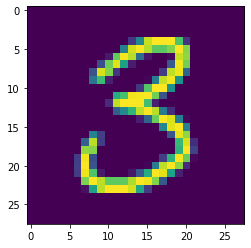

In [6]:
data_3 = FullSet_3.values.reshape([FullSet_3.shape[0],28,28])
img_3 = data_3[3,:,:]
plt.imshow(img_3[int(img_3.shape[0]*(1-0.5)):,int(img_3.shape[1]*(0.5)):])
plt.imshow(img_3)

#from PIL import Image
from matplotlib import cm
#im = Image.fromarray(np.uint8(img_3 * 255) , 'L')
#hist = im.histogram()
#for i in range(256):
    #plt.bar(i,hist[i])
#plt.show()

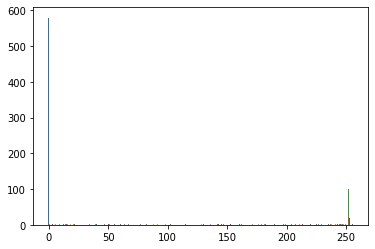

In [9]:
from PIL import Image
data_7 = FullSet_7.values.reshape([FullSet_7.shape[0],28,28])
img_7 = data_7[800,:,:]
im = Image.fromarray(np.uint8(img_7 * 255) , 'L')
hist = im.histogram() 
for i in range(256):
    plt.bar(i,hist[i])
plt.show()

In [98]:
FeatSet_3.head(), FeatSet_7.head()

(      feat_1     feat_2     feat_3     feat_4     feat_5     feat_6
 0  66.839216  70.372549  72.113725  68.580392  19.929412   9.988235
 1  45.800000  47.858824  51.960784  49.901961  17.980392  11.701961
 2  47.196078  57.521569  55.847059  45.521569  17.070588  12.243137
 3  38.454902  39.705882  35.541176  34.290196  13.905882  13.788235
 4  66.349020  74.427451  82.505882  74.427451  25.686275  11.294118,
       feat_1     feat_2     feat_3     feat_4     feat_5     feat_6
 0  30.623529  33.623529  41.745098  38.745098  15.396078   7.498039
 1  34.964706  42.117647  53.929412  46.776471  12.898039   8.501961
 2  16.870588  25.447059  42.921569  34.345098   0.000000  12.941176
 3  45.329412  50.313725  57.729412  52.745098  31.505882   8.603922
 4  31.996078  38.760784  54.541176  47.776471   5.254902   9.815686)

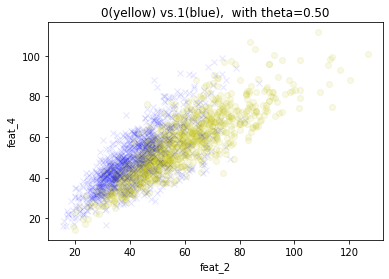

In [137]:
theta=0.8
def jitter(X,sigma=0.3):
    random_sign = (-1)**np.random.randint(1,3,*X.shape)
    return X + np.random.normal(0,sigma,*X.shape)*random_sign


horizontal = 'feat_2'
vertical = 'feat_4'
alpha = 0.1
sigma = 0.3
plt.plot(jitter(FeatSet_3[horizontal],sigma), jitter(FeatSet_3[vertical],sigma),'yo',alpha=alpha)
plt.plot(jitter(FeatSet_7[horizontal],sigma), jitter(FeatSet_7[vertical],sigma),'bx',alpha=alpha)
plt.xlabel(horizontal)
plt.ylabel(vertical)
plt.title('0(yellow) vs.1(blue),  with theta=%0.2f'%theta)
plt.show()

### Ejercicio
+ Crear nuevas características derivadas de las primeras 8 extraidas y añadelas a *FeatSet_0* y *FeatSet_1*

**Repaso** 

+ Te habrás dado cuenta de que ninguna de ellas está ya en el intervalo [0,1]. <br>
  De hecho la escala de algunas es muy superior a la de otras, por ejemplo el área es un orden de magnitud superior. <br>
  $\Rightarrow$ Crea una función que escale un dataframe a [0,1] de acuerdo con el valor máximo y mínimo de cada una de sus columnas. <br>
  $\quad$ Recuerda que la función debe devolver el dataframe escalado y los valores respecto a los cuales ha escalado.
  
*Esta función ya se creó en un cuaderno anterior. En el futuro utilizaremos métodos de scikit-learn para esto.*

In [94]:
A = np.array([[1,2,3], [4,5,6]])
print(np.amax(np.sum(A, axis=0)))

9


Prueba recorte imagen a número

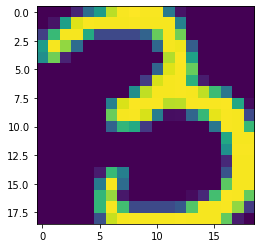

In [8]:
data_3 = FullSet_3.values.reshape([FullSet_3.shape[0],28,28])
img_3 = data_3[300,:,:]
plt.imshow(img_3[int(img_3.shape[0]*(1-0.5)):,int(img_3.shape[1]*(0.5)):])
plt.imshow(img_3)

#ancho
col = img_3.sum(axis=0)
indc = np.argwhere(col > 0)
#alto
row = img_3.sum(axis=1)
indr = np.argwhere(row > 0)
img_rec_3 = img_3[int(indr[0]):int(indr[-1]), int(indc[0]):int(indc[-1])]
plt.imshow(img_rec_3)

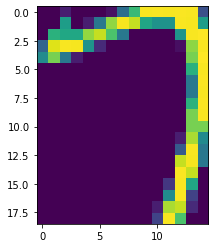

In [4]:
data_7 = FullSet_7.values.reshape([FullSet_7.shape[0],28,28])
img_7 = data_7[2,:,:]
plt.imshow(img_7[int(img_7.shape[0]*(1-0.5)):,int(img_7.shape[1]*(0.5)):])
plt.imshow(img_7)

#ancho
col = img_7.sum(axis=0)
indc = np.argwhere(col > 0)
#alto
row = img_7.sum(axis=1)
indr = np.argwhere(row > 0)
img_rec_7 = img_7[int(indr[0]):int(indr[-1]), int(indc[0]):int(indc[-1])]
plt.imshow(img_rec_7)